# Milestone 2

In [1]:
%cd ..
# imports 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scripts_m2 import *
import torch 
from torch import nn 
from torch import optim

/home/karimgamaleldin/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/karimgamaleldin/NLP_PROJECT_111/QA Task milestone


In [2]:
# Getting the dataloaders and tokenizers
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer()

Loading tokenizer from ./tokenizers/tokenizer.json...
Filtered dataset size: 19993 out of original 20000
Filtered dataset size: 1996 out of original 2000


In [3]:
vocab_size = 10000         # Size of the vocabulary
embed_dim = 300            # Dimensionality of the embeddings
hidden_size = 100          # Base hidden size; BiLSTM outputs will be 2*hidden_size
dropout = 0.2
num_layers = 3          # Number of LSTM layers
pad_idx = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the BiDAF model
model = DrQAReader(vocab_size=vocab_size, embed_dim=embed_dim, hidden_size=hidden_size, dropout=dropout, pad_idx=pad_idx, num_layers=num_layers)
model = model.to(device)

# Setup an optimizer (e.g., Adam)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)

train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model, 
    train_dataloader=train_dataloader, 
    val_dataloader=dev_dataloader, 
    optimizer=optimizer, 
    criterion=criterion, 
    num_epochs=10, 
    device=device, 
    inputs = ["context", "question", "attention_mask_question"],
    evaluate_val_dataset=True,
)


Epoch 1/10: 100%|██████████| 625/625 [00:41<00:00, 15.15it/s, loss=6.77]


Epoch 1 Loss: 7.4952


Evaluating: 100%|██████████| 625/625 [00:22<00:00, 28.26it/s]


Training Loss: 6.1076
Training Metrics: {'start_accuracy': 0.18296403741309458, 'start_precision': 0.1826624741091776, 'start_recall': 0.18296403741309458, 'start_f1_score': 0.18110772717745993, 'end_accuracy': 0.19246736357725203, 'end_precision': 0.19487577723748364, 'end_recall': 0.19246736357725203, 'end_f1_score': 0.19056254943333514, 'joint_exact_match': 0.08688040814285, 'span_overlap_f1': 0.14863436126831062}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 25.19it/s]


Validation Loss: 7.1863
Validation Metrics: {'start_accuracy': 0.1187374749498998, 'start_precision': 0.12767819580498213, 'start_recall': 0.1187374749498998, 'start_f1_score': 0.11571970341834387, 'end_accuracy': 0.12324649298597194, 'end_precision': 0.13662264808669733, 'end_recall': 0.12324649298597194, 'end_f1_score': 0.12183052339485673, 'joint_exact_match': 0.04759519038076152, 'span_overlap_f1': 0.09072806758708166}
--------------------------------------------------


Epoch 2/10: 100%|██████████| 625/625 [00:44<00:00, 14.15it/s, loss=6.46]


Epoch 2 Loss: 6.0903


Evaluating: 100%|██████████| 625/625 [00:25<00:00, 24.13it/s]


Training Loss: 5.1979
Training Metrics: {'start_accuracy': 0.25073775821537536, 'start_precision': 0.2502817902672543, 'start_recall': 0.25073775821537536, 'start_f1_score': 0.24791695053342697, 'end_accuracy': 0.26434251988195867, 'end_precision': 0.26712087447586635, 'end_recall': 0.26434251988195867, 'end_f1_score': 0.2638428523539505, 'joint_exact_match': 0.14860201070374632, 'span_overlap_f1': 0.2252695098138963}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 23.26it/s]


Validation Loss: 6.8185
Validation Metrics: {'start_accuracy': 0.15581162324649298, 'start_precision': 0.1642578120497005, 'start_recall': 0.15581162324649298, 'start_f1_score': 0.15199544585573213, 'end_accuracy': 0.156312625250501, 'end_precision': 0.16810996783566773, 'end_recall': 0.156312625250501, 'end_f1_score': 0.15391380504163996, 'joint_exact_match': 0.07565130260521043, 'span_overlap_f1': 0.13324929207473998}
--------------------------------------------------


Epoch 3/10: 100%|██████████| 625/625 [00:42<00:00, 14.68it/s, loss=5.29]


Epoch 3 Loss: 5.4426


Evaluating: 100%|██████████| 625/625 [00:24<00:00, 25.09it/s]


Training Loss: 4.5271
Training Metrics: {'start_accuracy': 0.3187615665482919, 'start_precision': 0.316017369365583, 'start_recall': 0.3187615665482919, 'start_f1_score': 0.3144734345178212, 'end_accuracy': 0.34141949682388834, 'end_precision': 0.338178105251131, 'end_recall': 0.34141949682388834, 'end_f1_score': 0.3364298082297424, 'joint_exact_match': 0.2091732106237183, 'span_overlap_f1': 0.2899057063787068}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 20.40it/s]


Validation Loss: 6.6489
Validation Metrics: {'start_accuracy': 0.16733466933867736, 'start_precision': 0.1730676669607969, 'start_recall': 0.16733466933867736, 'start_f1_score': 0.16350636766026627, 'end_accuracy': 0.1778557114228457, 'end_precision': 0.19162884529707822, 'end_recall': 0.1778557114228457, 'end_f1_score': 0.17516447330858775, 'joint_exact_match': 0.08967935871743488, 'span_overlap_f1': 0.15045454270085087}
--------------------------------------------------


Epoch 4/10: 100%|██████████| 625/625 [00:42<00:00, 14.56it/s, loss=5.66]


Epoch 4 Loss: 4.9601


Evaluating: 100%|██████████| 625/625 [00:20<00:00, 29.89it/s]


Training Loss: 4.1028
Training Metrics: {'start_accuracy': 0.37943280148051817, 'start_precision': 0.3786020102787435, 'start_recall': 0.37943280148051817, 'start_f1_score': 0.3771071469199683, 'end_accuracy': 0.40464162456859903, 'end_precision': 0.4053625123984153, 'end_recall': 0.40464162456859903, 'end_f1_score': 0.4022163926112928, 'joint_exact_match': 0.2601910668734057, 'span_overlap_f1': 0.3470424077456347}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 29.54it/s]


Validation Loss: 6.6840
Validation Metrics: {'start_accuracy': 0.1743486973947896, 'start_precision': 0.1824529925157131, 'start_recall': 0.1743486973947896, 'start_f1_score': 0.17259319299286208, 'end_accuracy': 0.1908817635270541, 'end_precision': 0.20039174724280742, 'end_recall': 0.1908817635270541, 'end_f1_score': 0.18709078678880522, 'joint_exact_match': 0.0966933867735471, 'span_overlap_f1': 0.1564841671063435}
--------------------------------------------------


Epoch 5/10: 100%|██████████| 625/625 [00:35<00:00, 17.47it/s, loss=4.23]


Epoch 5 Loss: 4.5688


Evaluating: 100%|██████████| 625/625 [00:19<00:00, 32.01it/s]


Training Loss: 3.6062
Training Metrics: {'start_accuracy': 0.43955384384534585, 'start_precision': 0.438461422199837, 'start_recall': 0.43955384384534585, 'start_f1_score': 0.43659467514295247, 'end_accuracy': 0.45400890311609066, 'end_precision': 0.45489345975088796, 'end_recall': 0.45400890311609066, 'end_f1_score': 0.45067105753297315, 'joint_exact_match': 0.3153603761316461, 'span_overlap_f1': 0.40183263038564354}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 30.12it/s]


Validation Loss: 6.7941
Validation Metrics: {'start_accuracy': 0.18286573146292584, 'start_precision': 0.1879624958712874, 'start_recall': 0.18286573146292584, 'start_f1_score': 0.17878257531367098, 'end_accuracy': 0.18286573146292584, 'end_precision': 0.19257738261785373, 'end_recall': 0.18286573146292584, 'end_f1_score': 0.17966280645560898, 'joint_exact_match': 0.10571142284569138, 'span_overlap_f1': 0.16634628443543675}
--------------------------------------------------


Epoch 6/10: 100%|██████████| 625/625 [00:38<00:00, 16.44it/s, loss=3.9] 


Epoch 6 Loss: 4.2045


Evaluating: 100%|██████████| 625/625 [00:25<00:00, 24.52it/s]


Training Loss: 3.1211
Training Metrics: {'start_accuracy': 0.5063272145250838, 'start_precision': 0.5065904444266717, 'start_recall': 0.5063272145250838, 'start_f1_score': 0.5045918676793094, 'end_accuracy': 0.5293852848496974, 'end_precision': 0.5300937840304387, 'end_recall': 0.5293852848496974, 'end_f1_score': 0.5272375714386422, 'joint_exact_match': 0.3796828890111539, 'span_overlap_f1': 0.47095603572446926}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 28.46it/s]


Validation Loss: 7.0559
Validation Metrics: {'start_accuracy': 0.1813627254509018, 'start_precision': 0.18883820569661106, 'start_recall': 0.1813627254509018, 'start_f1_score': 0.17862794723567393, 'end_accuracy': 0.19138276553106212, 'end_precision': 0.19946346197570755, 'end_recall': 0.19138276553106212, 'end_f1_score': 0.18905260187417935, 'joint_exact_match': 0.10470941883767534, 'span_overlap_f1': 0.16971016354617122}
--------------------------------------------------


Epoch 7/10: 100%|██████████| 625/625 [00:42<00:00, 14.67it/s, loss=4.52]


Epoch 7 Loss: 3.8552


Evaluating: 100%|██████████| 625/625 [00:21<00:00, 28.70it/s]


Training Loss: 2.7531
Training Metrics: {'start_accuracy': 0.5600960336117641, 'start_precision': 0.561066638169389, 'start_recall': 0.5600960336117641, 'start_f1_score': 0.5591350455610412, 'end_accuracy': 0.5914570099534837, 'end_precision': 0.5929934202127927, 'end_recall': 0.5914570099534837, 'end_f1_score': 0.5893974668765365, 'joint_exact_match': 0.4401040364127445, 'span_overlap_f1': 0.5314358164185153}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 28.03it/s]


Validation Loss: 7.3578
Validation Metrics: {'start_accuracy': 0.17234468937875752, 'start_precision': 0.18339380034080477, 'start_recall': 0.17234468937875752, 'start_f1_score': 0.17147672496804928, 'end_accuracy': 0.18336673346693386, 'end_precision': 0.18930676360545623, 'end_recall': 0.18336673346693386, 'end_f1_score': 0.18065444009483, 'joint_exact_match': 0.09769539078156313, 'span_overlap_f1': 0.1617821993353026}
--------------------------------------------------


Epoch 8/10: 100%|██████████| 625/625 [00:39<00:00, 15.77it/s, loss=3.27]


Epoch 8 Loss: 3.5491


Evaluating: 100%|██████████| 625/625 [00:23<00:00, 27.16it/s]


Training Loss: 2.4558
Training Metrics: {'start_accuracy': 0.616465763017056, 'start_precision': 0.6165435735465007, 'start_recall': 0.616465763017056, 'start_f1_score': 0.6149236452370532, 'end_accuracy': 0.6339718901615565, 'end_precision': 0.6339527093012826, 'end_recall': 0.6339718901615565, 'end_f1_score': 0.6308635800564192, 'joint_exact_match': 0.49412294303006055, 'span_overlap_f1': 0.5835463665706078}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 28.48it/s]


Validation Loss: 7.4031
Validation Metrics: {'start_accuracy': 0.17685370741482967, 'start_precision': 0.1876275874523896, 'start_recall': 0.17685370741482967, 'start_f1_score': 0.1751739140659554, 'end_accuracy': 0.19438877755511022, 'end_precision': 0.19845809484464355, 'end_recall': 0.19438877755511022, 'end_f1_score': 0.18932184272279723, 'joint_exact_match': 0.10470941883767534, 'span_overlap_f1': 0.16627531061612397}
--------------------------------------------------


Epoch 9/10: 100%|██████████| 625/625 [00:41<00:00, 14.94it/s, loss=4.05]


Epoch 9 Loss: 3.2699


Evaluating: 100%|██████████| 625/625 [00:23<00:00, 26.57it/s]


Training Loss: 2.1653
Training Metrics: {'start_accuracy': 0.662181763617266, 'start_precision': 0.6627622768224147, 'start_recall': 0.662181763617266, 'start_f1_score': 0.6613070313794926, 'end_accuracy': 0.6830390636722853, 'end_precision': 0.6848475458657911, 'end_recall': 0.6830390636722853, 'end_f1_score': 0.681078956598888, 'joint_exact_match': 0.5440904316510778, 'span_overlap_f1': 0.6352902454235296}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 24.91it/s]


Validation Loss: 7.7707
Validation Metrics: {'start_accuracy': 0.17735470941883769, 'start_precision': 0.18541543646663555, 'start_recall': 0.17735470941883769, 'start_f1_score': 0.17541515297562488, 'end_accuracy': 0.19589178356713427, 'end_precision': 0.20182161696390113, 'end_recall': 0.19589178356713427, 'end_f1_score': 0.1918024391126683, 'joint_exact_match': 0.11523046092184369, 'span_overlap_f1': 0.1811445065569251}
--------------------------------------------------


Epoch 10/10: 100%|██████████| 625/625 [00:41<00:00, 15.05it/s, loss=3.91]


Epoch 10 Loss: 3.0263


Evaluating: 100%|██████████| 625/625 [00:20<00:00, 30.63it/s]


Training Loss: 1.8316
Training Metrics: {'start_accuracy': 0.7071475016255689, 'start_precision': 0.7076498968055529, 'start_recall': 0.7071475016255689, 'start_f1_score': 0.7065272065585363, 'end_accuracy': 0.7263542239783924, 'end_precision': 0.7274706703085451, 'end_recall': 0.7263542239783924, 'end_f1_score': 0.7247485058540983, 'joint_exact_match': 0.5980093032561397, 'span_overlap_f1': 0.6848519562016209}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 29.87it/s]

Validation Loss: 8.3003
Validation Metrics: {'start_accuracy': 0.17735470941883769, 'start_precision': 0.17948643316808324, 'start_recall': 0.17735470941883769, 'start_f1_score': 0.1736156731665702, 'end_accuracy': 0.20440881763527055, 'end_precision': 0.2147732134809563, 'end_recall': 0.20440881763527055, 'end_f1_score': 0.20097978733267766, 'joint_exact_match': 0.11523046092184369, 'span_overlap_f1': 0.1794516943978396}
--------------------------------------------------


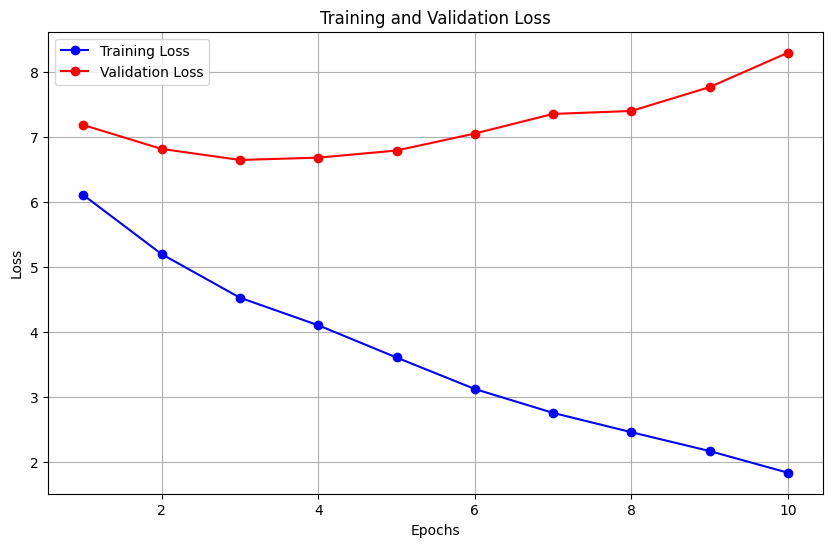

In [5]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

In [6]:
model_path = "models/qa_context_model_dqra.pkl"

In [7]:
save_model(model, model_path)

FileNotFoundError: [Errno 2] No such file or directory: 'models/qa_context_model_dqra.pkl'

In [ ]:
model = load_model(model_path=model_path)

Model loaded from models/qa_context_model_dqra.pkl


In [10]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss(ignore_index=1)
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Evaluating: 100%|██████████| 625/625 [00:24<00:00, 25.72it/s]


Validation Loss: 1.8315
Validation Metrics: {'start_accuracy': 0.7071475016255689, 'start_precision': 0.7076498968055529, 'start_recall': 0.7071475016255689, 'start_f1_score': 0.7065272065585363, 'end_accuracy': 0.7263542239783924, 'end_precision': 0.7274706703085451, 'end_recall': 0.7263542239783924, 'end_f1_score': 0.7247485058540983, 'joint_exact_match': 0.5980093032561397, 'span_overlap_f1': 0.6848519562016209}


(1.8315112356185914,
 {'start_accuracy': 0.7071475016255689,
  'start_precision': 0.7076498968055529,
  'start_recall': 0.7071475016255689,
  'start_f1_score': 0.7065272065585363,
  'end_accuracy': 0.7263542239783924,
  'end_precision': 0.7274706703085451,
  'end_recall': 0.7263542239783924,
  'end_f1_score': 0.7247485058540983,
  'joint_exact_match': 0.5980093032561397,
  'span_overlap_f1': 0.6848519562016209})

In [9]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss(ignore_index=1)
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Evaluating: 100%|██████████| 63/63 [00:02<00:00, 24.60it/s]

Validation Loss: 8.3003
Validation Metrics: {'start_accuracy': 0.17735470941883769, 'start_precision': 0.17948643316808324, 'start_recall': 0.17735470941883769, 'start_f1_score': 0.1736156731665702, 'end_accuracy': 0.20440881763527055, 'end_precision': 0.2147732134809563, 'end_recall': 0.20440881763527055, 'end_f1_score': 0.20097978733267766, 'joint_exact_match': 0.11523046092184369, 'span_overlap_f1': 0.1794516943978396}


(8.300255904122004,
 {'start_accuracy': 0.17735470941883769,
  'start_precision': 0.17948643316808324,
  'start_recall': 0.17735470941883769,
  'start_f1_score': 0.1736156731665702,
  'end_accuracy': 0.20440881763527055,
  'end_precision': 0.2147732134809563,
  'end_recall': 0.20440881763527055,
  'end_f1_score': 0.20097978733267766,
  'joint_exact_match': 0.11523046092184369,
  'span_overlap_f1': 0.1794516943978396})

In [11]:
preds, true_labels = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Predicting: 100%|██████████| 63/63 [00:02<00:00, 26.41it/s]


In [12]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Predicted Answer: a growing sport
True Answer: rugby
--------------------------------------------------
Predicted Answer: rugby is also a growing sport in southern california , particularly at the high school level , with increasing numbers of schools adding rugby as an official school sport
True Answer: an official school sport
--------------------------------------------------
Predicted Answer: high school
True Answer: high school
--------------------------------------------------
Predicted Answer: 
True Answer: framework
--------------------------------------------------
Predicted Answer: complexity classes have complicated definitions that do not fit into this framework . thus , a typical complexity class
True Answer: complexity classes
--------------------------------------------------
Predicted Answer: 
True Answer: complicated definitions
--------------------------------------------------
Predicted Answer: palm springs
True Answer: palm springs
----------------------------------

In [13]:
train_preds, train_true_labels = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Predicting: 100%|██████████| 625/625 [00:24<00:00, 25.82it/s]


In [ ]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Predicted Answer: innate immune system
True Answer: humoral ( or antibody )
--------------------------------------------------
Predicted Answer: pronunciation
True Answer: accent
--------------------------------------------------
Predicted Answer: deputy chief of the defence staff ( capability ), deputy cds ( personnel and training ) and deputy cds ( operations ). the surgeon general
True Answer: the surgeon general
--------------------------------------------------
Predicted Answer: nine children married into royal and noble families across the continent , tying them together and earning her the sobriquet " the grandmother of europe ". after albert ' s death in 1861
True Answer: 1861
--------------------------------------------------
Predicted Answer: sichuan basin
True Answer: hengduan mountains
--------------------------------------------------
Predicted Answer: widespread
True Answer: widespread
--------------------------------------------------
Predicted Answer: middle power
True 